# DATA 601: HW3



**Learning Objectives**
- Work with realworld datasets that can be compared to a model.
- Apply vectorization concepts to iterative problems.
- Explore different programming paradigms to solve problems.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Warm up

In this notebook, we'll use file input/output operations provided by Python to read in data from text files. The function needed to read data is provided in the code cell below. You may wish to review the following section from the Python Tutorial:  

- [Reading and Writing Files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

In [51]:
import re

def fileToList( fname, regexp=r'\W+' ):
    '''Read text from a file using the provided regular expression. If no regular expression is provided, 
    the default behaviour is to split the text into words removing any punctuation and empty strings. 
    The resulting words are returned in a list.'''
    file = open(fname, 'rt', encoding='utf8')
    text = file.read()
    file.close()
    # split based on provided regular expression and remove empty strings
    # By default, matches words.
    return [x for x in re.split(regexp, text) if x]

<!-- BEGIN QUESTION -->

## Question 1 (15 points)

### Comparing empirically determined frequencies to a model 

##### Motivation: 
It is useful to compare a theoretical distribution visually with a data set to examine if an assumptions about the data is true, this problem provides you an exercises in this comparison.

##### Tools: 
For this question you may use `NumPy` and `matplotlib`. You may also use any built-in data structures or functions. However, please do not use `pandas`. 

##### Overview:
This question asks you to perform a frequency analysis on the first letter of words in the novel "Moby Dick" by Herman Melville, and compare the result with the first letter law (FLL) inspired by Benford's law. For visual comparison, you are asked to graph the result obtained along with the theoretical result to determine how closely the results match.

 
##### Background: 

[Benford’s law](https://en.wikipedia.org/wiki/Benford%27s_law) describes the expected frequency of the leading digit in a set of numbers. Inspired by this law, [Yan et al. (2018)](https://www.sciencedirect.com/science/article/pii/S0378437118310768) have recently proposed a First Letter Law (FLL) that predicts the percentages of first letters in novels. 

An overview of FLL in the context of the English language (26 letters) is as follows.

The probability $p_i$ of the $i$-th ($1 \le i \le 26$) most frequently occurring letter in a novel is given by:
$$
p_i = \frac{26 - 25\log_{26}25 - i \log_{26} i + (i-1) \log_{26} (i-1)}
           {26 \cdot 25 \log_{26} (\tfrac{26}{25})}
$$

For example, the most frequently occurring letter ($i=1$) in an English novel appears with probability:
$$
p_1 = \frac{1 + 25 \log_{26}(\tfrac{26}{25})}{26 \cdot 25 \log_{26}(\tfrac{26}{25})}.
$$

For more details, please consult:

 - _Benford's Law and First Letter of Word_, Xiaoyong Yan, Seong-Gyu Yang, Beom Jun Kim, Petter Minnhagen (Dec. 2017) [arXiv:1712.06074](https://doi.org/10.48550/arXiv.1712.06074)


##### Process: 

##### Step 0)

Reflect on the data. 
- Do you think the novel Moby Dick will exhibit the First Letter Law? Why/why not? 

Grammar has a significant impact on how we structure sentences and even words. That is why I want to take into consideration grammar and maybe some specifically related information to this novel to make _preliminary judgment_. 

1. In English, there are articles such as "**t**he" and "**a**". So, I expect to see those letters at the top of the list.
2. Letter "s" is used to make regular nouns plural and possessives.
3. **W**as, **w**ere, **i**s - tenses. The man tells the story about past actions. 
4. The story is about "**W**hale" so I expect to see frequent mentions of this word. 

Regarding to if this particular novel will exhibit the FLL - I don't know, as the FLL feels so counterintuitive at this stage. At least, I expect to see the letters `'t', 'a', 'w', 'i'` as the most frequent first letters. 

##### Step 1) 
- Read in the relevant data:

    Use the function `fileToList` (defined above) to read the text file corresponding to the novel Moby Dick (data courtesy of [Project Gutenberg](https://www.gutenberg.org/ebooks/2701)). Please use the function's default behaviour, i.e. you do not need to supply a regular expression.

Now perform the following tasks. 

- Convert all words to lower case.
- For each word, retain only the first letter, drop any word that does not start with a letter ([a-z]).
- Determine the frequency of each of the letters `a` through `z`.
- Calculate the probability of each of the letters occurring in the novel (as first letters) by using the formula $p=frequency/total$.
- Sort the probabilities in descending order. This will give you $p_i$.
- Plot the probability distribution, with $i$ on the horizontal axis and probability on the vertical axis. Also indicate the _rank_ of the letters (which letter is the most frequent, second-most frequent, and so on).
- On the same plot include a plot of the First Letter Law. 

##### Return data types
- For the counts the data type should be an integer
- For the probabilities the data type should be a float

##### Hints:
- You may use `NumPy`, in fact it is recommended. Remember `NumPy` arrays are indexed and you can create an array of `n` zeros using `np.zeros(n)`.
- Use the fact that $(i-1) \log_{26}(i-1)$ for $i=1$ is $0$ to avoid numerical issues when evaluating the FLL formula.
- Independent Probability is defined as the frequency of a particular event divided by the total number of events.
- You can do calculations in line using `NumPy` in `matplotlib`.


Please provide your solution below.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

d = fileToList('moby_dick.txt') # Read data

In [53]:
def fll(x):
    num = 26 - 25 * log26(25) - x * log26(x) + (x - 1) * log26(x - 1) 
    denom = 26 * 25 * log26(26/25)
    return num/denom

log26 = lambda x: np.log(x) / np.log(26) # Citation: https://en.wikipedia.org/wiki/Logarithm#Change_of_base
fll1 = (1 + 25 * log26(26/25)) / (26 * 25 * log26(26/25)) # for i == 1 case
fll_prob = np.asarray([fll(i) if i > 1 else fll1 for i in np.arange(1,27)])

In [54]:
d = np.array(d) # Convert ro numpy array
d = np.char.lower(d) # Convert all words to lower case

In [55]:
abc = list('abcdefghijklmnopqrstuvwxyz')
d = d.astype('U1') # retain only the first letter. Citation: https://numpy.org/doc/stable/reference/arrays.dtypes.html
# Drop any word that does not start with a letter ([a-z])
mask = np.isin(d, abc)
d = d[mask]

In [56]:
unique, counts = np.unique(d, return_counts=True) # Determine the frequency of each of the letters 
prob = counts / np.sum(counts) # Calculate the probability of each of the letters

In [57]:
# Sort the probabilities in descending order
prob_sorted = np.sort(prob)[::-1]
prob_sorted_ix = np.argsort(-prob) 

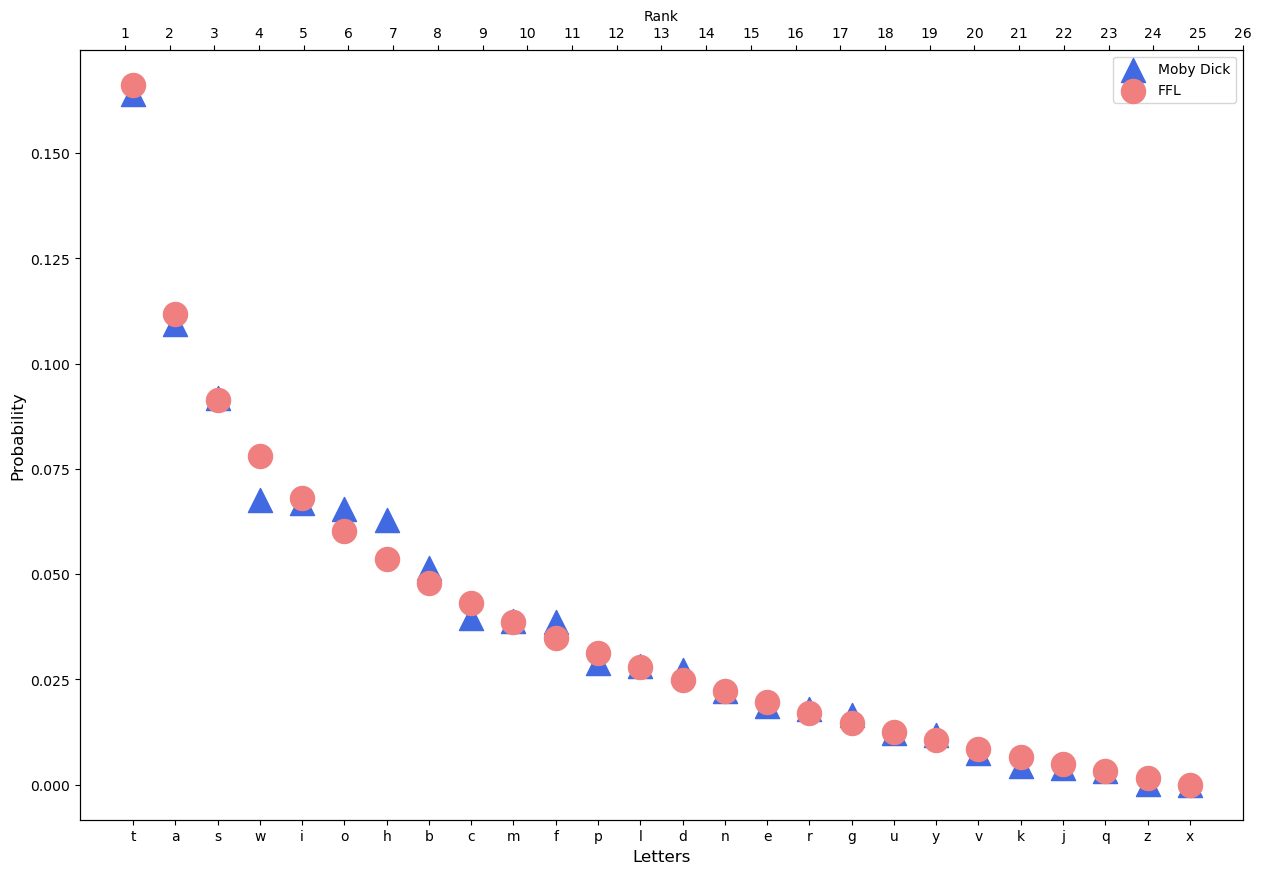

In [58]:
# Plot the probability distribution and First Letter Law
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.scatter(unique[prob_sorted_ix], prob[prob_sorted_ix], label='Moby Dick', marker='^', s=300, c='royalblue')
ax1.scatter(unique[prob_sorted_ix], fll_prob, label='FFL', marker='o', s=300, c='lightcoral')
ax1.set_xlabel('Letters', fontsize = 'large')
ax1.set_ylabel('Probability', fontsize = 'large')
ax2.set_xticks(np.arange(len(unique)) + 1)
ax2.set_xlabel('Rank')
ax1.legend() 
plt.show()

##### Step 2) 

Calculate the Mean Square Error (MSE) between the distribution your obtained and the one given by the FLL. For this problem, the MSE is given by:
$$
\text{MSE} = \frac{1}{26} \sum_{i=1}^{26} (p_i - \hat{p}_i),
$$
where $p_i$ is the probability given by the FLL and $\hat{p}_i$ is the probability determined from the data. 

In [59]:
ase = np.sum(fll_prob - prob) / 26
mse = np.sum((fll_prob - prob)**2) / 26
print(ase)
print("\n")
print(mse)
print("\n")

2.3867459824761665e-16


0.0021372388884989294




##### Step 3)

Comment on your plot and the numerical value of the MSE obtained above. Is the result as expected? Why/Why not? 

The Mean Square Error (MSE) between the data and Benford's law prediction is tiny, about 0.0021. Visual and numerical results confirm Benford's Law and First Letter of Word. The effect that counts of first letters of words follows some specific function/distribution surprised me because it feels counterintuitive. Of course, the probability for each letter of the alphabet should not be equal (approx 16.6%) due to grammatical rules. From here, I would like to test the frequency letter law on 1) another alphabet with a different number of letters; 2) another type of text (not novels), probably less formal. But that is the work for another assignment :)

<!-- END QUESTION -->

## Question 2 (15 points):

### Visualizing Trends in an Index


###### Motivation: 
This exercise is intended to help you explore and consider the time scale that is used to present data. This question explores graphing data over different time intervals.

###### Tools: 
For this question you may use NumPy and matplotlib. You may also use any built-in data structures or functions,  Please do not use `pandas`.


##### Problem:
In this exercise you will plot the [Air Quality Index](https://aqicn.org/data-platform/register/) (Pm25) along with 7-day and 14-day averages. The provided dataset (in csv format) contains the daily average air quality for the Calgary central monitoring location from Sep. 01, 2020 to Aug 31, 2021 (data obtained from https://aqicn.org/data-platform/register/). 

###### Step 0)

Reflect on the data. What are some of its limitations? (Name two.)

_Type your answer here, replacing this text._
1. Aggregated daily data doesn't reflect how air quality changed during the day. Usually, in the morning and late afternoon, when most citizens commute to work/home, the Pm25 indicator is high. High values are dangerous for health, and we cannot see if that is the case with the aggregated daily average. Hourly data can satisfy this requirement.  
2. Also, different parts of the city of Calgary have different pollution levels. Some industrial zones or places around big roadways/highways produce more carbon emissions than public parks and green spaces. And this data doesn't reflect that.        

##### Steps: 
- Read the dataset using the `fileToList` function defined above. For this question, use the regular expression `r'[,\r\n]+'` rather than the default. Inspect the result and familiarize yourself with the content of the returned list.
- Observe that the average values are at a daily interval, and that all days have a value recorded. We therefore do not need the date information. Clean up the data and only retain the air quality information. Store the result in a list or a `numpy` array in floating point format.
- Recall that a [simple moving average](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) is defined as the (unweighted) mean over the previous $N$ days.<br> 
Determine the simple moving average of the air quality. The number of days $N$ to average over should be adjustable. If you are using `numpy`, you may find the function [`np.convolve`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) helpful.  
- Plot the raw air quality index data along with 7-day and 14-day simple moving average. Plot on the same figure in order to help you visually ascertain the effect of the filter.

##### Return data types:
- The Floating averages should be presented as intergers


##### Hints:
- Generators can be very useful in some situations
- Use plt.legend to create a legend for your plot
- If you get stuck try referring to relevant documentation

Please provide your solution below.

In [60]:
# Read the dataset
d = fileToList('calgary-central 2, alberta-air-quality.csv', regexp=r'[,\r\n]+')
d[:10] # Inspect the result and familiarize yourself with the content

['date',
 ' pm25',
 '2020-10-01',
 '29',
 '2020-10-02',
 '48',
 '2020-10-03',
 '39',
 '2020-10-04',
 '53']

In [61]:
d = d[3::2] # Clean up the data and only retain the air quality information
d = np.array([float(x) for x in d]) # Store the result in numpy array in floating point format
d[:10]

array([29., 48., 39., 53., 49., 27., 23., 31., 30., 30.])

In [62]:
def ma_convolve(x, n):
    return np.convolve(x, np.ones(n), 'valid') / n

def ma(x, n):
    ma = []
    cum_sum = 0
    temp = []
    for i, e in enumerate(x):
        if i + 1 <= n:
            cum_sum += e
            temp.append(e)
            ma.append(cum_sum / (i + 1))
        else:
            temp.pop(0)
            temp.append(e)
            ma.append(sum(temp)/n)
    return np.array(ma)

In [63]:
# Calculate MAs
# The Floating averages should be presented as intergers
ma_conv7 = ma_convolve(d, 7).astype(int)
ma_conv14 = ma_convolve(d, 14).astype(int)

ma7 = ma(d, 7).astype(int)
ma14 = ma(d, 14).astype(int)

ma_conv14 = np.concatenate(([np.nan]*(14-1), ma_conv14))
ma_conv7 = np.concatenate(([np.nan]*(7-1), ma_conv7))

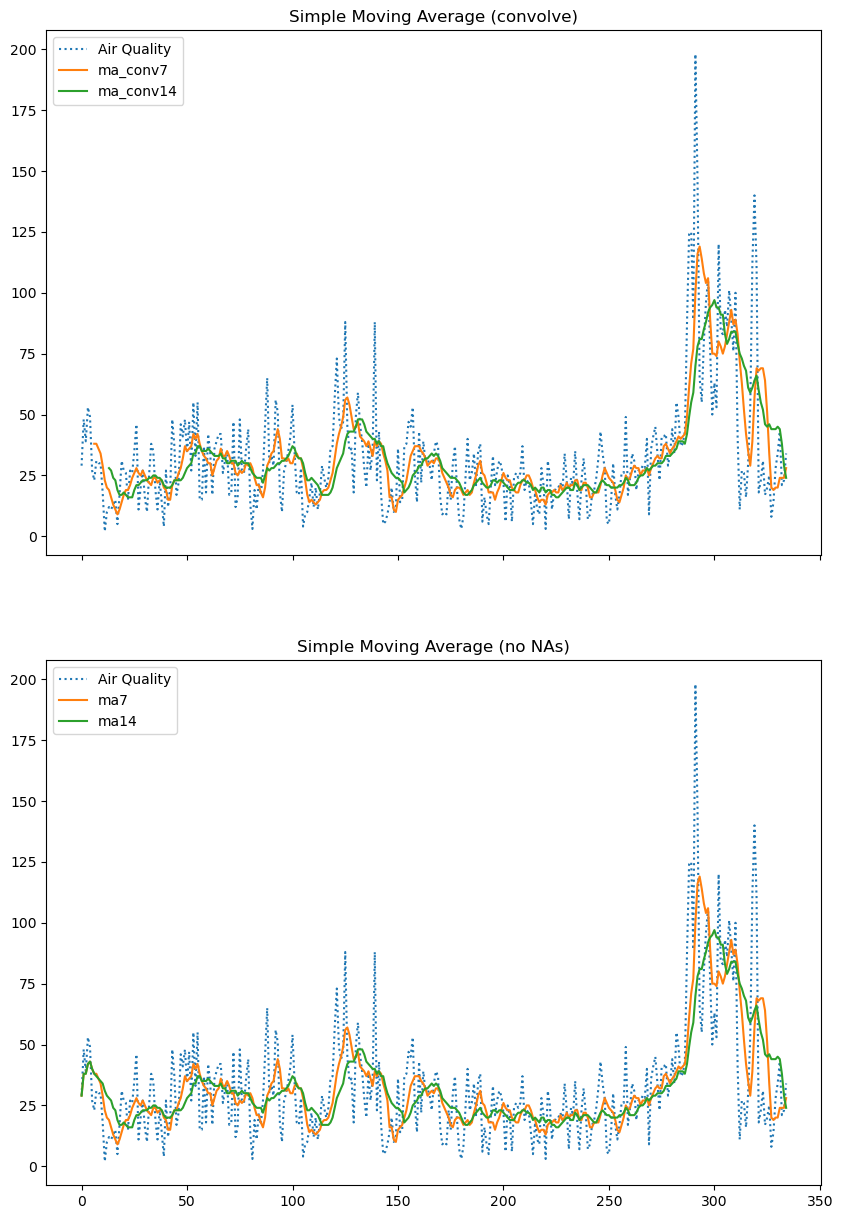

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15), sharex=True)

ax1.plot(np.arange(len(d)), d, label='Air Quality', linestyle='dotted')
ax1.plot(np.arange(len(ma_conv7)), ma_conv7, label='ma_conv7', linestyle='solid')
ax1.plot(np.arange(len(ma_conv14)), ma_conv14, label='ma_conv14', linestyle='solid')
ax2.plot(np.arange(len(d)), d, label='Air Quality', linestyle='dotted')
ax2.plot(np.arange(len(ma7)), ma7, label='ma7')
ax2.plot(np.arange(len(ma14)), ma14, label='ma14')

ax1.legend()
ax2.legend()
ax1.set_title('Simple Moving Average (convolve)')
ax2.set_title('Simple Moving Average (no NAs)')
plt.show()



Please use the Markdown cell below to answer the following questions.

- Describe algorithmically how you set out to calculate the moving average. What was your process?
- What is the effect of the moving average filter? 
- In what circumstances would you _not_ want to use a moving average? Do you think that the moving average is appropriate in this case? 




- As np.convolve method produces NAs (which it should because `n` values needed to be accumulated), I decided to calculate my function. In this case, when roughly 350 data points and 7,14 - days MAs are calculated, we can sacrifice some data. But if 50 or 100-day Moving Averages are interesting for a higher level smoothing effect, a third of the data is too big lost.

    The _algorithm_ is:
    1. Initialize the N-time window and empty lists to store results;
    2. Go through each element's index and value to check if there are enough elements to calculate N-average; 
    3. If not enough, then calculate the cumulative sum to divide by n-elements (use index for that) to get avg;
    4. When there are enough elements - pop the first element from the list and append a new one. Find avg of this temporary list. Iterate.
    5. Store the calculated avg to the final list at each iteration. 


- The moving average has a smoothing effect. 
    - The advantage of this - the _trends_ can be easily seen. As example from this case, we can see a rise and fall between day 275 and 325 - something to explore. The trend can be defined if 7-MA stays above 14-MA for a while. During another period, they oscillate, crossing each other frequently.  
    - The disadvantage is _lost_ of information. And in this case, as we apply MAs to already averaged daily data - the loss is even more significant.

- That is why I think applying MAs, in this case, is _inappropriate_. As we are talking about Air Quality, I think it is crucial to stay _aware of high/max values and intraday seasonality effects_. A Boxplot chart or candlestick chart can be more informative. The last one gives us start and end values as well as high and low for the period (week, month).